**Importing required Library**


In [90]:
from astropy.coordinates import AltAz, EarthLocation, Angle, FK5, Longitude
from astropy.time import Time
import pandas as pd
from tabulate import tabulate
from astropy import units as u
from math import radians
from numpy import *

In [91]:

def Angle(degrees, minutes, seconds):
    return degrees + minutes/60 + seconds/3600

def declination(alt,az,lat):
    alt = radians(alt)
    az = radians(az)
    lat = radians(lat)
    d = sin(alt)*sin(lat) + cos(lat)*cos(az)*cos(alt)
    return arcsin(d)*(180/pi)

def Hourangle(alt,az,lat):
    alt = radians(alt)
    az = radians(az)
    lat = radians(lat)    
    H = (sin(az)) / (sin(lat)*cos(az) - cos(lat)*tan(alt))
    h = arctan(H)*(180/pi)
    if h < 0 :
        return 360 + h
    else : return h

In [92]:
alt = [[Angle(34,59,20.9),Angle(36,56,28.9),Angle(30,48,01.8)],[Angle(7,47,49.0),Angle(8,43,18.7),Angle(48,21,14.8)]]
az = [[Angle(1,10,08.5),Angle(4,16,23.3),Angle(4,3,27.6)],[Angle(179,53,50.0),Angle(185,4,19.4),Angle(186,11,39.6)]]
date_time =[['2024-03-05 04:22:38','2024-03-05 04:22:38','2024-03-05 04:22:38'],['2024-03-11 10:09:47','2024-03-11 10:09:47','2024-03-14 06:21:28']]
Star_name=[['Kochab','Pherkad','Akfa Farkadain'],['Milaplacidus','Omega Car','Atria']]
Location=['Mumbai-India','Welkom-South Africa']
Limiting_dec = [Angle(70,55,37.81),Angle(62,1,21.29)]
Lat=[Angle(19,4,29.28),Angle(62,15,53.78)]
Long=[Angle(72,53,8.15),Angle(26,44,6.22)]
ha = [[Angle(34,59,20.9),Angle(36,56,28.9),Angle(30,48,01.8)],[Angle(7,47,49.0),Angle(8,43,18.7),Angle(48,21,14.8)]]
dec = [[Angle(34,59,20.9),Angle(36,56,28.9),Angle(30,48,01.8)],[Angle(7,47,49.0),Angle(8,43,18.7),Angle(48,21,14.8)]]

In [93]:
time_objects = [Time(dt, format='iso', scale='utc').jd for dt in date_time]
print(time_objects)

[array([2460374.68238426, 2460374.68238426, 2460374.68238426]), array([2460380.92346065, 2460380.92346065, 2460383.76490741])]


In [94]:
for i in range(len(alt)):
    for j in range(len(alt[i])):
        dec[i][j] = declination(alt[i][j],az[i][j],Lat[i])
        ha[i][j] = Hourangle(alt[i][j],az[i][j],Lat[i])
        


In [95]:
print(dec)
print(ha)

[[74.05202046237282, 71.74537329319185, 77.71380161643792], [-19.938071453293038, -18.904077641828096, 20.729621898479078]]
[[356.512417639484, 349.04023352229626, 343.40364757193066], [359.89167986942084, 5.299867224377972, 4.396964559821937]]


In [97]:
from prettytable import PrettyTable
import csv

# Create a table
table = PrettyTable()

# Add headers
table.field_names = ["Location", "Date & Time", "Julian Date & Time" , "Limiting Dec", "Lat", "Long", "Star Name", "Altitude", "Azimuth", "HA", "Declination"]

# Add data to the table
for i in range(len(Location)):
    for j in range(len(Star_name[i])):
        table.add_row([
            Location[i],
            date_time[i][j],
            time_objects[i][j],
            Limiting_dec[i],
            Lat[i],
            Long[i],
            Star_name[i][j],
            alt[i][j],
            az[i][j],
            ha[i][j],
            dec[i][j],
        ])

# Print the table
print(table)

# Save the table as a CSV file
csv_file_path = "astronomy_data.csv"
with open(csv_file_path, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(table.field_names)
    for row in table:
        csv_writer.writerow(row)

print(f"\nCSV file saved at: {csv_file_path}")

+---------------------+---------------------+--------------------+-------------------+-------------------+-------------------+----------------+-------------------+--------------------+--------------------+---------------------+
|       Location      |     Date & Time     | Julian Date & Time |    Limiting Dec   |        Lat        |        Long       |   Star Name    |      Altitude     |      Azimuth       |         HA         |     Declination     |
+---------------------+---------------------+--------------------+-------------------+-------------------+-------------------+----------------+-------------------+--------------------+--------------------+---------------------+
|     Mumbai-India    | 2024-03-05 04:22:38 | 2460374.682384259  | 70.92716944444444 |      19.0748      | 72.88559722222223 |     Kochab     | 34.98913888888889 | 1.1690277777777778 |  356.512417639484  |  74.05202046237282  |
|     Mumbai-India    | 2024-03-05 04:22:38 | 2460374.682384259  | 70.92716944444444 |  

In [102]:
import pandas as pd

# Create a DataFrame
data = []
for i in range(len(Location)):
    for j in range(len(Star_name[i])):
        data.append([
            Location[i],
            date_time[i][j],
            time_objects[i][j],
            Limiting_dec[i],
            Lat[i],
            Long[i],
            Star_name[i][j],
            alt[i][j],
            az[i][j],
            ha[i][j],
            dec[i][j],
        ])

columns = ["Location", "Date & Time", "Julian Date & Time", "Limiting Dec", "Lat", "Long", "Star Name", "Altitude", "Azimuth", "HA", "Declination"]

df = pd.DataFrame(data, columns=columns)

# Print the DataFrame
print(df)

# Save the DataFrame as a CSV file
csv_file_path_pandas = "astronomy_data_pandas.csv"
df.to_csv(csv_file_path_pandas, index=False)

print(f"\nCSV file saved at: {csv_file_path_pandas}")


              Location          Date & Time  Julian Date & Time  Limiting Dec  \
0         Mumbai-India  2024-03-05 04:22:38        2.460375e+06     70.927169   
1         Mumbai-India  2024-03-05 04:22:38        2.460375e+06     70.927169   
2         Mumbai-India  2024-03-05 04:22:38        2.460375e+06     70.927169   
3  Welkom-South Africa  2024-03-11 10:09:47        2.460381e+06     62.022581   
4  Welkom-South Africa  2024-03-11 10:09:47        2.460381e+06     62.022581   
5  Welkom-South Africa  2024-03-14 06:21:28        2.460384e+06     62.022581   

         Lat       Long       Star Name   Altitude     Azimuth          HA  \
0  19.074800  72.885597          Kochab  34.989139    1.169028  356.512418   
1  19.074800  72.885597         Pherkad  36.941361    4.273139  349.040234   
2  19.074800  72.885597  Akfa Farkadain  30.800500    4.057667  343.403648   
3  62.264939  26.735061    Milaplacidus   7.796944  179.897222  359.891680   
4  62.264939  26.735061       Omega Car   

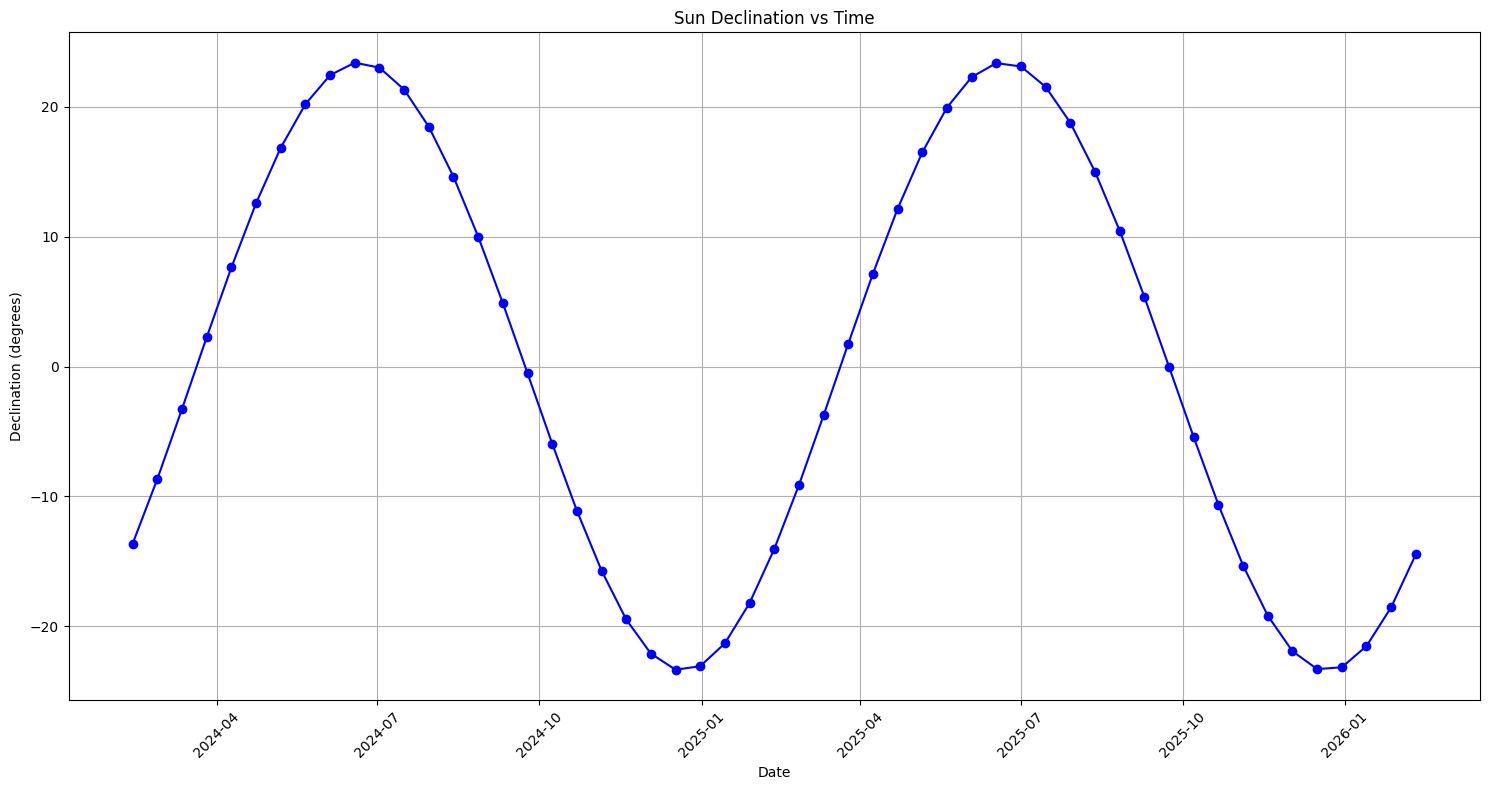

        Use get_body("moon") instead. [warnings]


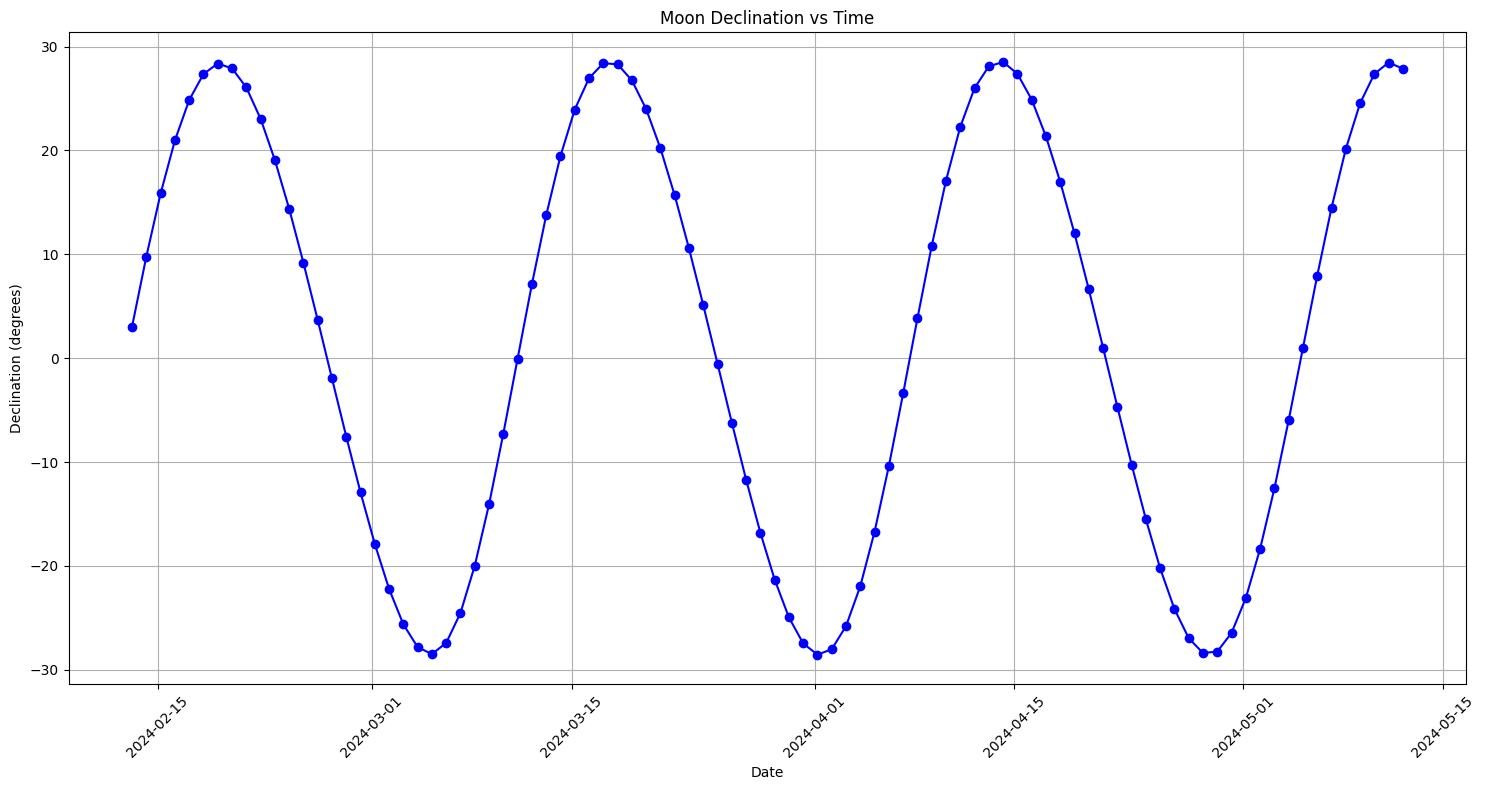

Maximum Declination of the Sun: 23.40458461784153 degrees
Minimum Declination of the Sun: -23.355686202984316 degrees


In [105]:
from astropy.coordinates import EarthLocation, AltAz, get_sun, get_moon
from astropy.time import Time
import astropy.units as u
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import numpy as np

def get_declination_vs_time(location, start_time, end_time, step_days, celestial_body):
    observer_location = EarthLocation(lat=location.lat, lon=location.lon, height=location.height)
    obs_time = Time(start_time)
    
    dates = []
    declinations = []

    while obs_time < end_time:
        celestial_body_coord = celestial_body(obs_time)
        altaz = celestial_body_coord.transform_to(AltAz(obstime=obs_time, location=observer_location))
        
        dates.append(altaz.obstime.datetime)
        declinations.append(celestial_body_coord.dec.deg)
        
        obs_time += step_days * u.day

    return dates, declinations

def plot_declination_vs_time(title, dates, declinations):
    df = pd.DataFrame({'Date': dates, 'Declination': declinations})
    plt.figure(figsize=(15, 8))
    plt.plot(df['Date'], df['Declination'], marker='o', linestyle='-', color='b')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Declination (degrees)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Set observer location and time range
observer_location = EarthLocation(lat='19d4m21s', lon='72d52m57s', height=0*u.m)  # Mumbai
start_time = Time.now()
end_time = Time.now() + 731 * u.day  # 1 year

# Get and plot Sun declination data with more data points
sun_dates, sun_declinations = get_declination_vs_time(observer_location, start_time, end_time, 14, get_sun)
plot_declination_vs_time('Sun Declination vs Time', sun_dates, sun_declinations)

# Get and plot Moon declination data with more data points
moon_dates, moon_declinations = get_declination_vs_time(observer_location, start_time, start_time + 90 * u.day, 1, get_moon)
plot_declination_vs_time('Moon Declination vs Time', moon_dates, moon_declinations)

# Find the maximum declination of the Sun
max_sun_declination = max(sun_declinations)
min_sun_declination = min(sun_declinations)
print("Maximum Declination of the Sun:", max_sun_declination, "degrees")
print("Minimum Declination of the Sun:", min_sun_declination, "degrees")

In [4]:
from astropy.time import Time

def mjd_to_unix_seconds(mjd):
    """
    Convert Modified Julian Date (MJD) to Unix time in seconds.
    
    Parameters:
        mjd (float): The Modified Julian Date to be converted.
        
    Returns:
        float: Unix time in seconds.
    """
    # Convert MJD to astropy Time object
    time = Time(mjd, format='mjd', scale='tt')
    
    # Convert to Unix time (seconds since Unix epoch)
    unix_time_seconds = time.unix
    
    return unix_time_seconds

# Example MJD values
mjdrefi = 49353
mjdreff = 0.000696574074

# Combined MJD reference
mjd_ref = mjdrefi + mjdreff

# Convert MJD to Unix time in seconds
unix_time = mjd_to_unix_seconds(mjd_ref)

print(f"Unix time (seconds since epoch) for MJD {mjd_ref}: {unix_time}")


Unix time (seconds since epoch) for MJD 49353.000696574076: 757382400.0000001


In [6]:
from astropy.time import Time

def seconds_to_mjd(seconds_since_epoch):
    """
    Convert Unix time in seconds (since epoch) to Modified Julian Date (MJD).
    
    Parameters:
        seconds_since_epoch (float): Unix time in seconds.
        
    Returns:
        float: Modified Julian Date (MJD).
    """
    # Convert seconds since epoch to astropy Time object
    time = Time(seconds_since_epoch, format='unix', scale='tt')
    
    # Convert to MJD
    mjd = time.mjd
    
    return mjd

# Example Unix time in seconds (since epoch)
unix_time_seconds = 8

# Convert Unix time in seconds to MJD
mjd = seconds_to_mjd(unix_time_seconds)

print(f"MJD for Unix time {unix_time_seconds} seconds since epoch: {mjd}")


MJD for Unix time 8 seconds since epoch: 40587.00055768614


In [8]:
from astropy.time import Time

def seconds_to_mjd(seconds_since_epoch):
    """
    Convert Unix time in seconds (since epoch) to Modified Julian Date (MJD).
    
    Parameters:
        seconds_since_epoch (float): Unix time in seconds.
        
    Returns:
        float: Modified Julian Date (MJD).
    """
    # Convert seconds since epoch to astropy Time object
    time = Time(seconds_since_epoch, format='unix', scale='tt')
    
    # Convert to MJD
    mjd = time.mjd
    
    return mjd

# Example Unix time in seconds (since epoch)
unix_time_seconds = 4.25

# Convert Unix time in seconds to MJD
mjd = seconds_to_mjd(unix_time_seconds)

print(f"MJD for Unix time {unix_time_seconds} seconds since epoch: {mjd}")


MJD for Unix time 4.25 seconds since epoch: 40587.00051428336
